Let's start by defining a \(training\) dataset&nbsp;$D=\{(x_i,y_i)|i=0,...,n\}$, with $n$ observations.<br>
$$p(y_{*} \mid y_1,\dots,y_n,x_1,\dots,x_n,x_{*}) \sim \mathcal{N}(K_*^{T} K^{-1}y,K_{**}-K_*^{T}K^{-1}K_*)$$<br>
$K_*^{T} K^{-1}y$ is kernel regression<br>
$$p\begin{pmatrix}
y_1 \\
\vdots \\
y_n \\
y_*
\end{pmatrix}
\mid
\begin{pmatrix}
x_1 & \dots & x_n & x_{*}
\end{pmatrix}
\sim \mathcal{N}(\mathbf{\mu},\boldsymbol{\Sigma})
$$<br>


In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import Image, display

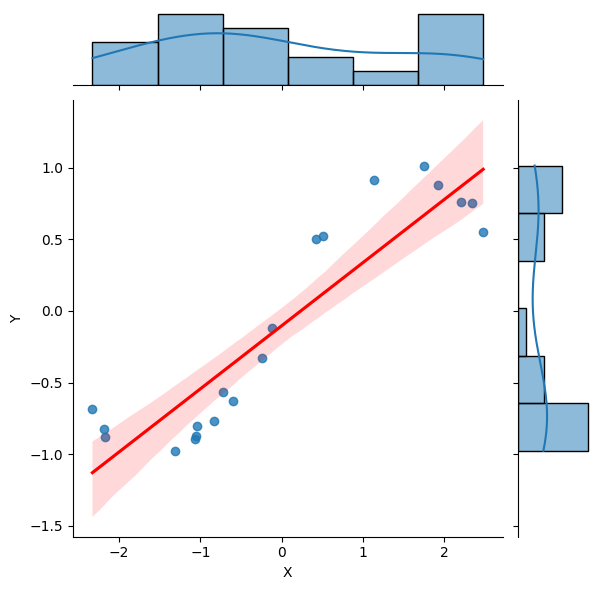

In [ ]:
# Generate sample data
X = np.random.uniform(-3.,3.,(20,1))
Y = np.sin(X) + np.random.randn(20,1)*0.05 # the observations Y include some noise
data = pd.DataFrame(np.hstack((X,Y)),columns=['X','Y'])
g = sns.jointplot(x='X',y='Y',data=data,kind='reg',line_kws={'color':'red'})
plt.show()

In [ ]:
def RBF_kernel(x1,x2,sigma=1.0):
    return np.exp(-np.linalg.norm(x1-x2)**2/(2*sigma**2))

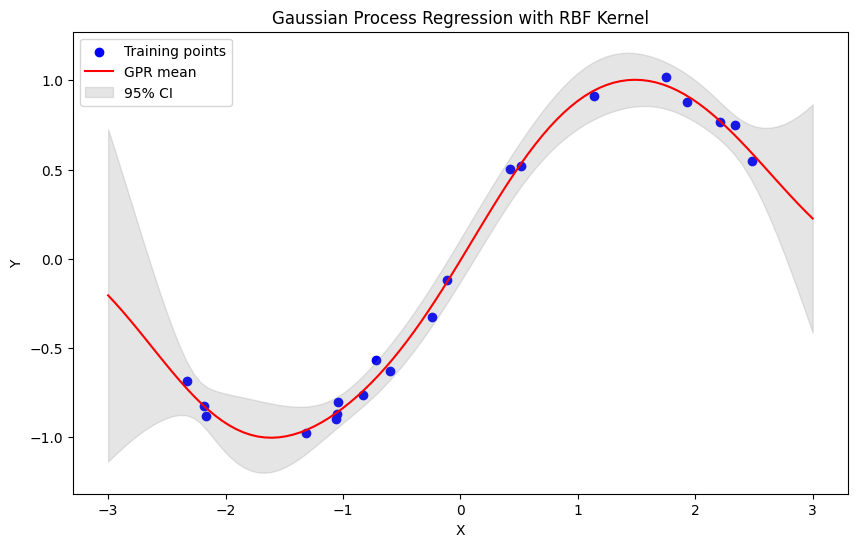

In [ ]:
sigma_noise = 0.1 # noise level, account for observation noise in the model
d = X.size
K_ = np.zeros((d,d)) # kernelized
for i in range(d):
    for j in range(d):
        K_[i,j] = RBF_kernel(X[i],X[j])

# Add noise variance to the diagonal
K_ += sigma_noise**2*np.eye(d)

# Test inputs for prediction
X_test = np.linspace(-3, 3, 100).reshape(-1, 1)
K_test = np.zeros((100, d))
for i in range(100):
  for j in range(d):
    K_test[i,j] = RBF_kernel(X_test[i],X[j])

# Compute predictive mean
K_inv = np.linalg.inv(K_)
mu_test = K_test@(K_inv)@(Y)
# Compute predictive variance
K_test_test = np.zeros((100, 100))
for i in range(100):
  for j in range(100):
    K_test_test[i,j] = RBF_kernel(X_test[i],X_test[j])

var_test = K_test_test - K_test@(K_inv)@(K_test.T)
std_test = np.sqrt(np.diag(var_test))

# Plotting the training points
plt.figure(figsize=(10, 6))
plt.scatter(X, Y, color='blue', label='Training points')

# Plotting the predictive mean
plt.plot(X_test, mu_test, color='red', label='GPR mean')

# Plotting the 95% CI
plt.fill_between(X_test.ravel(),
                 mu_test.ravel() - 2 * std_test,
                 mu_test.ravel() + 2 * std_test,
                 color='gray', alpha=0.2, label='95% CI')

plt.title('Gaussian Process Regression with RBF Kernel')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()


The dynamic demonstration of Gaussian process regression from the previous example is reproduced using Matlab, showcasing the entire update process. Note that these are two separate generations of sample data, so the training points will differ from the previous case. The code is attached below.

Mounted at /content/drive


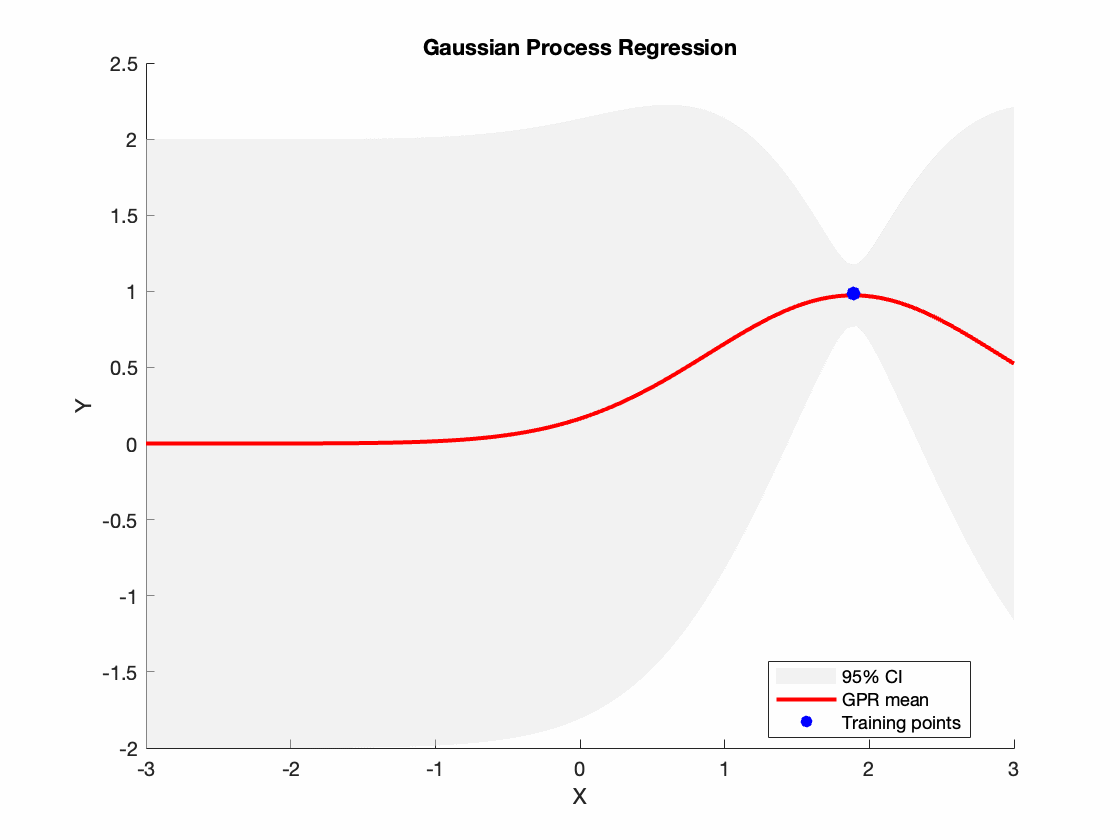

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
display(Image(filename='/content/drive/MyDrive/Colab Notebooks/new2GPR/simple_gp_gif_demo/simple_gp_demo.gif'))

# Gaussian Process Regression with UQpy

# Gaussian Process Regression with scikit-learn

# Gaussian Process regression with Gpy

# Reference

[1]&nbsp;CORNELL CS4780 "Machine Learning for Intelligent Systems"https://www.cs.cornell.edu/courses/cs4780/2018fa/lectures/lecturenote15.html;<br>

**Disclaimer:**<br>
[1]&nbsp;This project is not intended for commercial use; it is solely for the purpose of showcasing my personal learning journey and aims to assist others who are passionate about learning. All materials included are appropriately credited to the original content creators through **links** or **citations**;<br>
[2]&nbsp;Generative AI is utilized for text editing, code review, and related purposes.<br>